# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

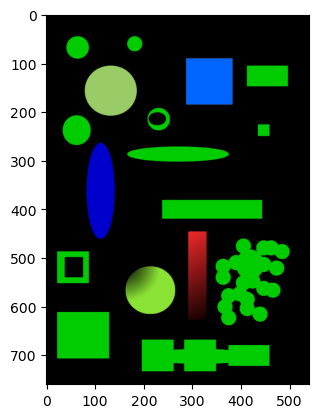

In [1]:
# use opencv to load and display the image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.io import imread, imshow, imsave

# lire l'image (avec imread)
image = imread("image_01.png")
# afficher image

plt.imshow(image)
plt.show()

In [2]:
# afficher la taille de l'image
image.shape

(760, 541, 4)

In [3]:
# l'image a trois couleur R,G,B. afficher les valeurs des trois couleurs pour le pixel x = 150, et y = 100


def get_rgb_values(image, x, y):
    rgb_values = image[y, x]
    return rgb_values

x, y = 100, 150
print(f"RGB values at (x={x}, y={y}): {get_rgb_values(image, x, y)}")

RGB values at (x=100, y=150): [153 204 102 255]


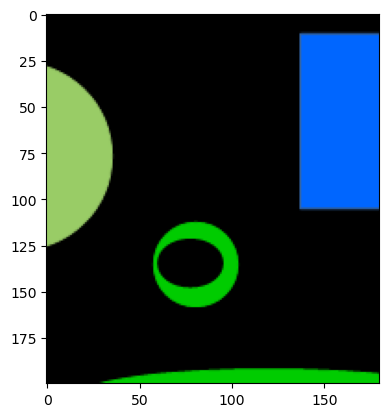

In [4]:
# Crop une partie de l'image (sélectionner une petite partie à partir des coordonnées)
cropped =image[80:280, 150:330]

plt.imshow(cropped)
plt.show()

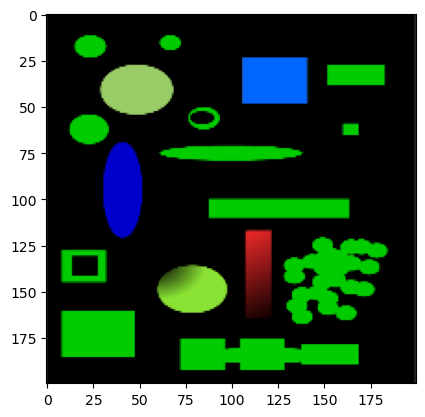

In [5]:
# redimensioner l'image à 200x200 pixels
resized = cv2.resize(image, (200,200))
# afficher resized
plt.imshow(resized)
plt.show()
# qu'est ce que vous remarquez !!


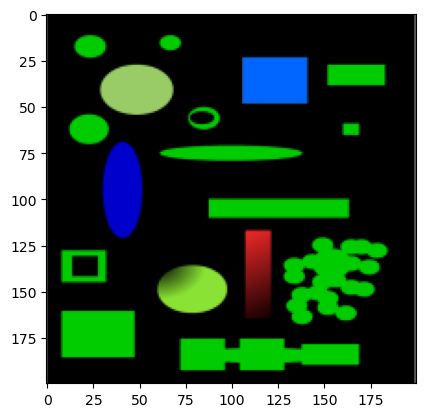

In [6]:
# redimensinner sans affecter l'image
resized = cv2.resize(image, (200,200),  interpolation=cv2.INTER_AREA)

plt.imshow(resized)
plt.show()

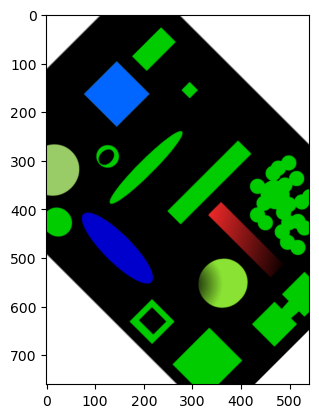

In [7]:
# faire tourner une image -45°
def rotate_45(image):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, 45, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

rotated = rotate_45(image)

plt.imshow(rotated)
plt.show()

Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

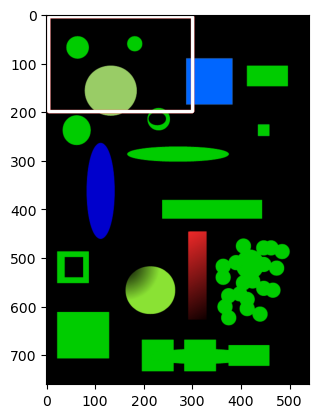

In [8]:
# dessiner un rectangle
start_point = (5, 5) 
end_point = (300, 200)
color = (255, 0, 0)
thickness = 5
rectangle = cv2.rectangle(image, start_point, end_point, color, thickness)

plt.imshow(rectangle)
plt.show()

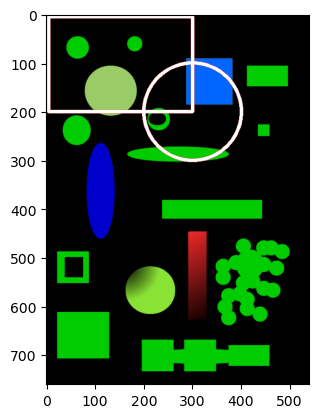

In [9]:
# dessiner un circle 
center = (300, 200)
radius = 100
color = (255, 0, 0)
thickness = 5
circle = cv2.circle(image, center, radius, color, thickness)

plt.imshow(circle)
plt.show()

# Filtrage d'image

* Blur
* Gaussian blur
* Median blur
* Sharpening
* Bilateral blur
* Bilateral filtering

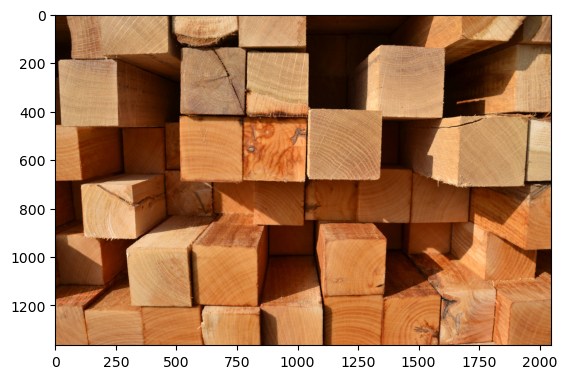

In [10]:
# charger et afficher l'image "bois"
bois = imread("bois.png")

plt.imshow(bois)
plt.show()

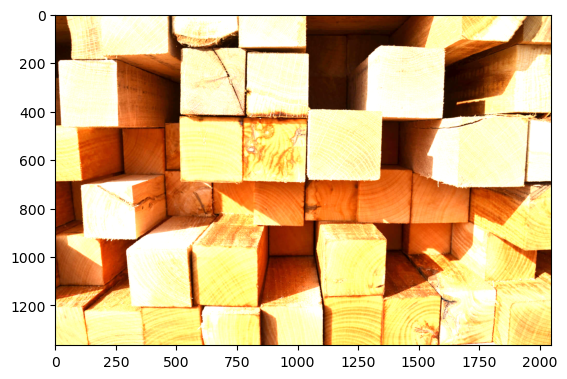

In [11]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2

blur_2 = cv2.filter2D(bois, -1, 2) 

plt.imshow(blur_2)
plt.show()

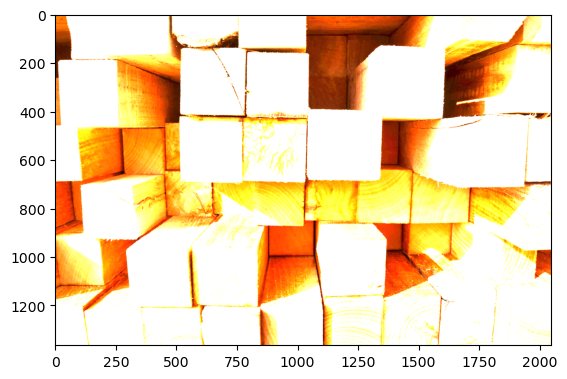

In [12]:
# Appliquer blur avec un kernel de taille 5x5
blur_5 = cv2.filter2D(bois, -1, 5) 

plt.imshow(blur_5)
plt.show()

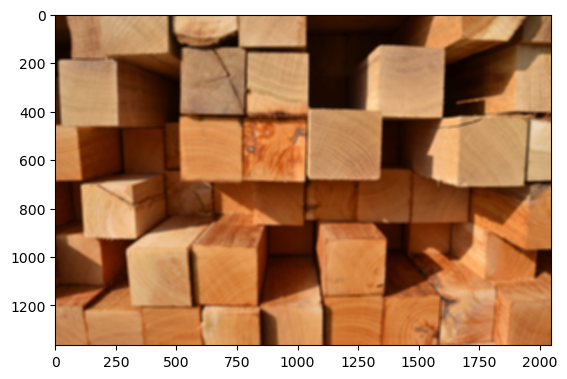

In [25]:
# gaussian blur
gaussian_blur = cv2.GaussianBlur(bois, (15, 15), 10)
plt.imshow(gaussian_blur)
plt.show()


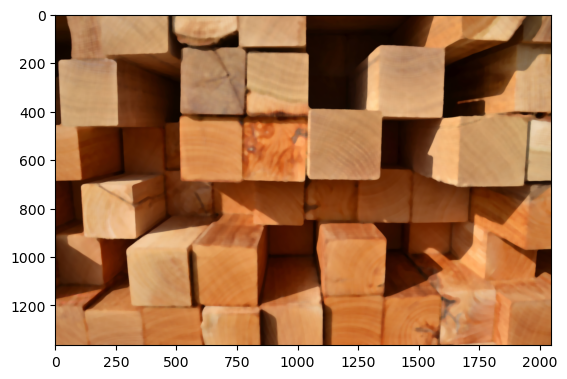

In [14]:
# median blur

median_blur = cv2.medianBlur(bois, 15)

plt.imshow(median_blur)
plt.show()

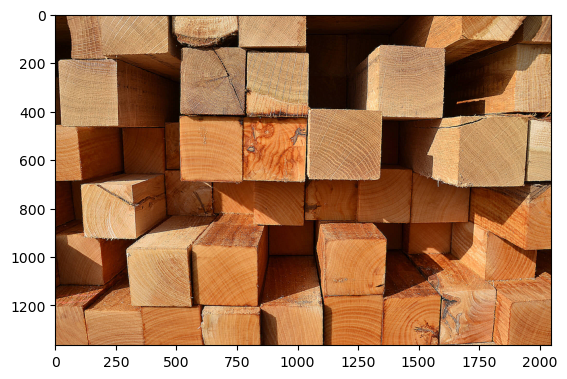

In [15]:
# sharpening
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

sharpened_image = cv2.filter2D(bois, -1, sharpening_kernel)
plt.imshow(sharpened_image)
plt.show()


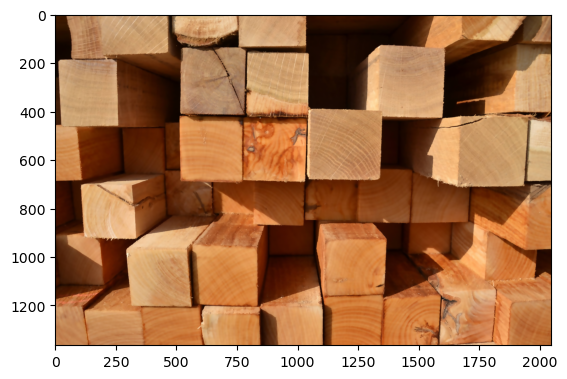

In [16]:
# bilateral filtering
bilateral = cv2.bilateralFilter(bois, 11, 41, 21)

plt.imshow(bilateral)
plt.show()

# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

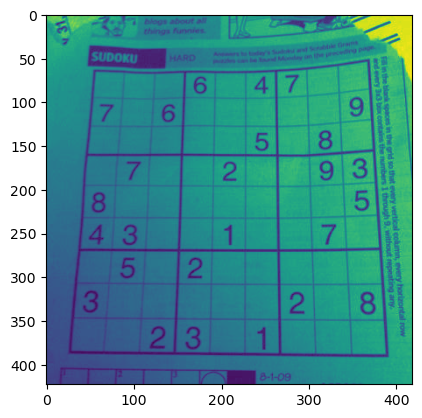

In [17]:
# charger et afficher l'image "sudoku"
sudoku = cv2.imread("sudoku.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(sudoku)
plt.show()

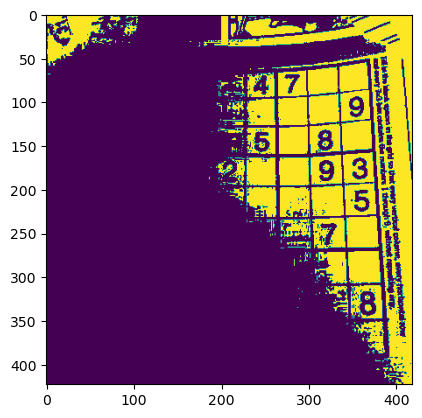

In [18]:
# appliquer un seuillage binaire d'un seuil de 127
ret, thresh_127 = cv2.threshold(sudoku, 127, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh_127)
plt.show()

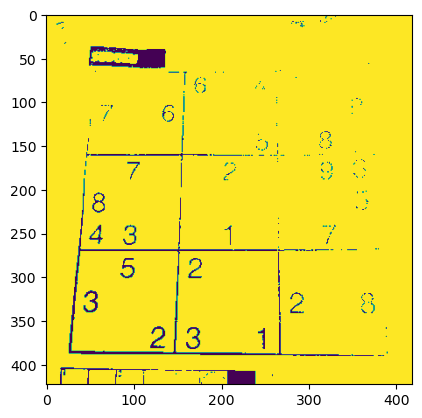

In [19]:
# appliquer un seuillage binaire d'un seuil de 30

ret, thresh_30 = cv2.threshold(sudoku, 30, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh_30)
plt.show()


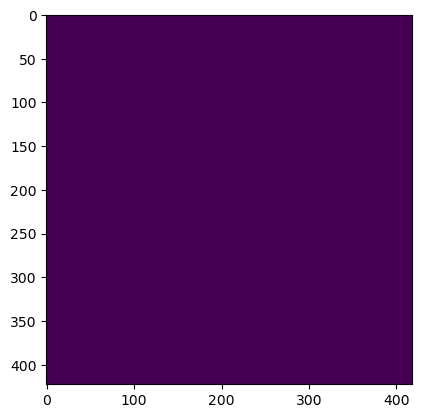

In [20]:
# appliquer un seuillage binaire d'un seuil de 240
ret, thresh_240 = cv2.threshold(sudoku, 240, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh_240)
plt.show()

Qu'est ce que vous remarquez ?!

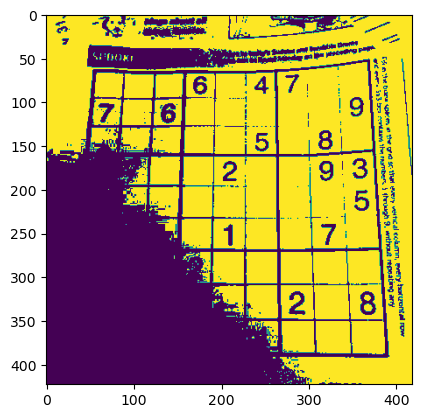

In [21]:
# appliquer "Otsu" seuillage
ret, thresh_otsu = cv2.threshold(sudoku, 0, 255, cv2.THRESH_OTSU) 
plt.imshow(thresh_otsu)
plt.show()

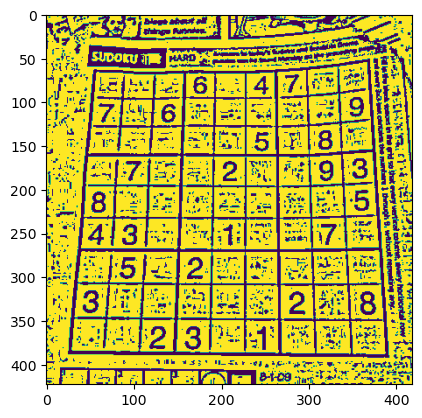

In [22]:
# appliquer "Adaptive threshold"

adaptive_thresh  = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh)
plt.show()


# Détection des bords

* Sobel
* Canny

In [23]:

bois2 = cv2.imread('bois.png')

#img_blur = cv2.GaussianBlur(img,(3,3), 0, 0)
cv2.imshow("test", bois2)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(bois2[..., ::-1])
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


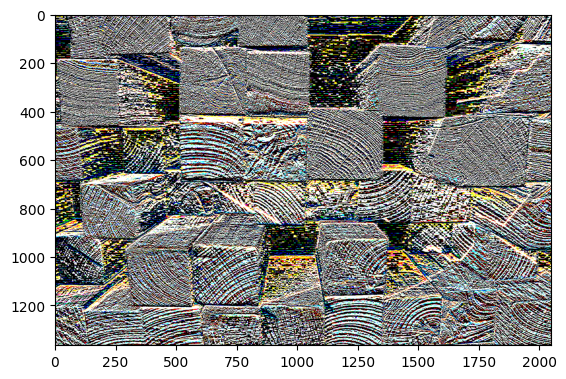

In [ ]:
# utiliser la methode sobel pour détecter les bords
# Vous pouvez utiliser d'autres images de votre choix
sboeled = cv2.Sobel(bois2, cv2.CV_64F, 0, 1, ksize=3)


plt.imshow(sboeled[..., ::-1])
plt.show()

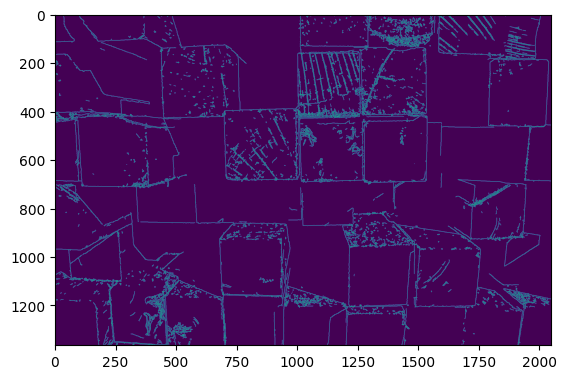

In [ ]:
# Canny
edges = cv2.Canny(image=bois2, threshold1=100, threshold2=200)
plt.imshow(edges[..., ::-1])
plt.show()

# Détection des contours

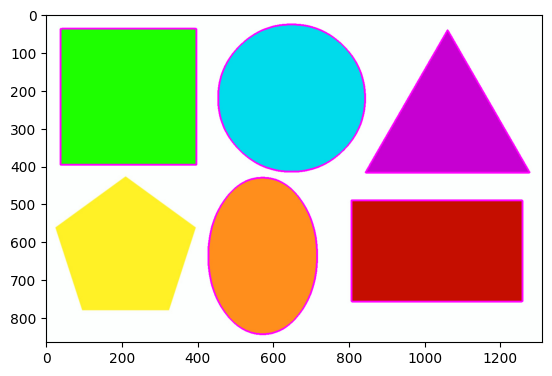

In [ ]:
# charger l'image 02
# faites une recherche sur internet pour détecter les contours des objets dans image_02

image2 = cv2.imread('image_02.png')
def mark_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer le seuil d'Otsu pour binariser l'image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Inverser l'image binaire si nécessaire
    inverted_binary = ~binary

    # Trouver les contours
    contours, hierarchy = cv2.findContours(inverted_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dessiner les contours
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (255, 0, 255), 3)
    return image_with_contours, contours

image_with_contours, contours = mark_contours(image2)

plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.show()

#  Compter des objets

In [ ]:
# Compter les objets

text = "There are {} objects here.".format(len(contours))
print(text)

There are 5 objects here.


# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

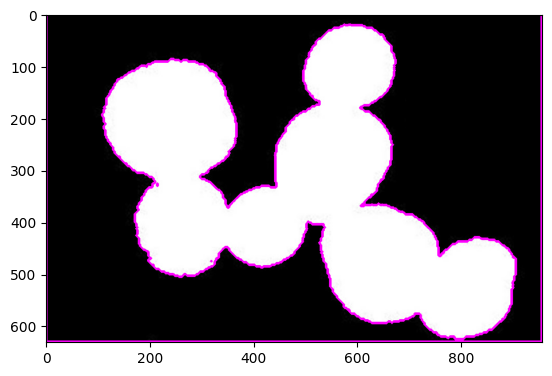

There are 4 objects here.


In [ ]:
#
image3 = cv2.imread('image_03.jpg')
image_with_contours2, contours2 = mark_contours(image3)

plt.imshow(cv2.cvtColor(image_with_contours2, cv2.COLOR_BGR2RGB))
plt.show()

text = "There are {} objects here.".format(len(contours2))
print(text)

In [ ]:
import cv2
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Load the image
image3 = cv2.imread('image_03.jpg')

if image3 is None:  # Check if image is loaded successfully
    print("Error: Image not found or failed to read")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blurring
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 2: Distance Transform
dist_transform = cv2.distanceTransform(gray, cv2.DIST_L2, 5)

# Step 4: Normalize the distance image for display
dist_transform_norm = cv2.normalize(dist_transform, None, 255, 0, cv2.NORM_MINMAX)

# Step 5: Find sure foreground area by finding the peaks
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

# Step 6: Marker labelling
coordinates = peak_local_max(sure_fg, min_distance=10)
markers = np.zeros_like(gray)
markers[coordinates[:, 0], coordinates[:, 1]] = 1

# Step 7: Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Step 8: Mark the region of unknown with zero
unknown = cv2.subtract(gray, sure_fg.astype(np.uint8))
markers[unknown == 255] = 0

# Step 9: Apply watershed
labels = watershed(-dist_transform, markers, mask=gray)

# Convert the labels to an image
labels_image = np.uint8(labels)

# Display the result
cv2.imshow('Watershed', image3)
cv2.imshow('Distance Transform', dist_transform_norm)
cv2.imshow('Markers', markers)
cv2.imshow('Labels', labels_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Bravo !